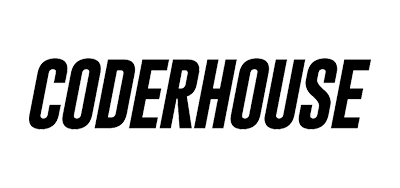



# Entrega N°1 Data Sciense I "Ventas Walmart"


En este proyecto realizaremos un análisis descriptivo de las ventas ocurridas desde enero hasta noviembre del 2024 para una serie específica de productos en todas las sucursales de Walmart en Estados Unidos. El objetivo es identificar patrones de compra, evaluar el impacto de distintos tipos de publicidad en los clientes y analizar las tendencias de venta según el mes del año.

#Preguntas claves


---

*   ¿Cuál es el producto que genera mayor ganancia para la empresa?

Hipotesis: El producto que genera mayor ganancia son los celulares.
*   ¿Qué categoría es la más vendida?

Hipotesis: la categoria mas vendida son los electrodomesticos.
*   ¿Qué estrategia de marketing ha demostrado ser más efectiva?

Hipotesis: la estrategia de marketing mas efectiva  es BOGO(Buy One, Get One).
*   ¿Existe una relación entre la fidelidad del cliente y su nivel de gasto?

Hipotesis: la relacion de fidelidad esta estrictamente relacionado hacia la cantidad de compra, dinero gastado  y el nivel de cliente.
*   ¿En qué mes se venden más productos? ¿Hay una relación con las fechas festivas? ¿En qué condiciones es más frecuente que una persona compre en Walmart?

Hipotesis: Donde sucederan la mayoria de las compras es en el periodo de fin de año, relacionado con las festividades como navidad y año nuevo. Ademas de si es feriado y con un clima nublado es mas problable que se acerquen personas al local.


*   ¿Cómo se comparan la demanda pronosticada (forecasted demand) y la demanda real (actual demand)?

Hipotesis: Al ser algo dificil de medir siento que habria un margen de error del 30% aproximadamente.

#Carga de librerias




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

url = "https://raw.githubusercontent.com/Ignacio-Boiveau/DataSciense1Coderhouse/refs/heads/master/Walmart.csv"
df = pd.read_csv(url)

# Desarrollo

#¿Qué categoría es la más vendida?

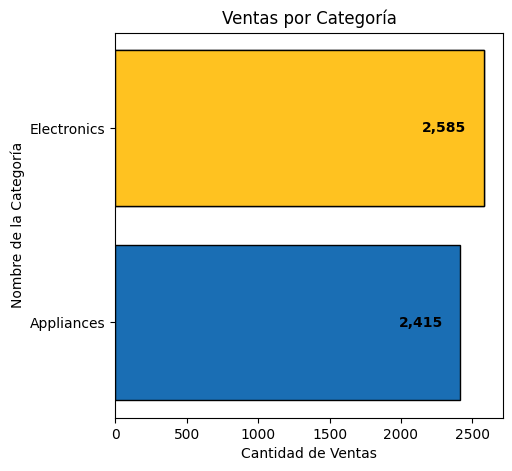

In [20]:
# Obtener la cantidad de ventas por categoría
ventas_productos = df['category'].value_counts()

plt.figure(figsize=(5, 5))

# Graficar las barras en azul
ax = sns.barplot(
    y=ventas_productos.index,
    x=ventas_productos.values,
    orient='h',
    hue=ventas_productos.index,
    palette=["#0071CE"] * len(ventas_productos)
)

# Resalta la categoría más vendida en amarillo
plt.barh(ventas_productos.index[0], ventas_productos.values[0], color="#FFC220")

for bar in ax.patches:
    bar.set_edgecolor("black")
    bar.set_linewidth(1)

for i, value in enumerate(ventas_productos.values):
    ax.text(value * 0.95, i, f'{value:,}', va='center', ha='right', fontsize=10, fontweight='bold', color='black')


# Personalización del gráfico
plt.title('Ventas por Categoría')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Nombre de la Categoría')

# Mostrar el gráfico
plt.show()


#¿Cuál es el producto que genera mayor ganancia ?

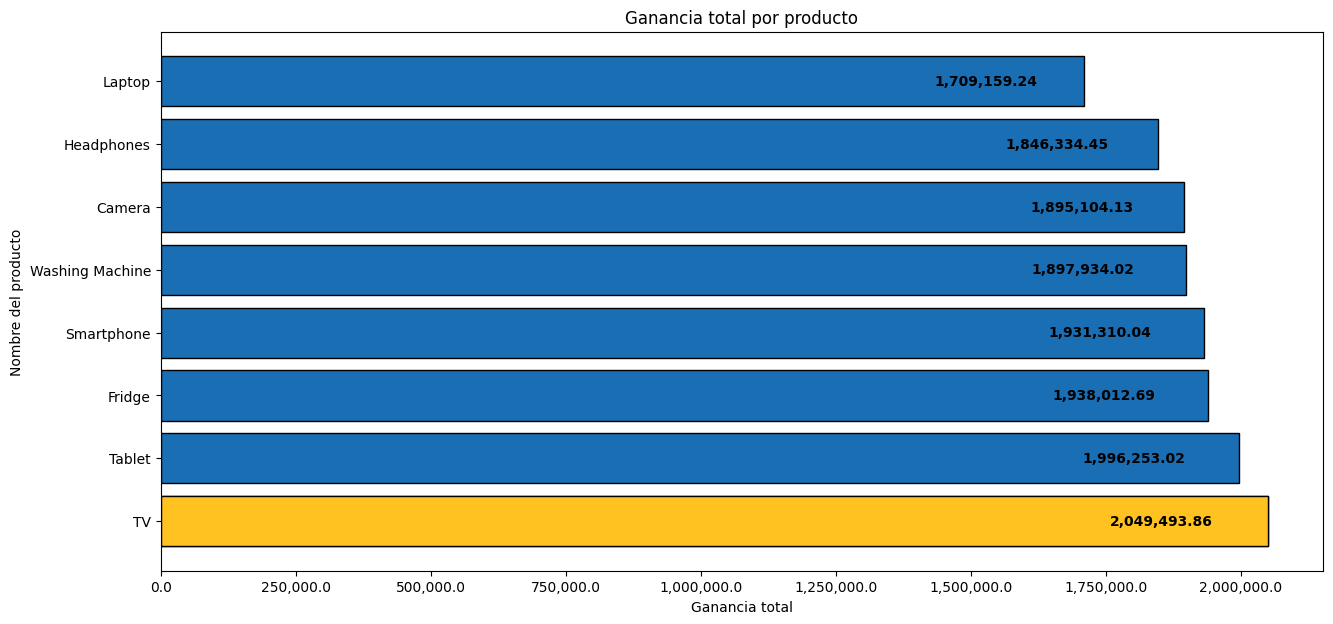

In [47]:
df['total'] = df['quantity_sold'] * df['unit_price']

# Agrupa por nombre de producto y suma las ganancias totales
total_producto = df.groupby('product_name')['total'].sum().sort_values()

# Encuentra el producto con la mayor ganancia
producto_mayor_ganancia = total_producto.idxmax()

# Crea el gráfico de barras horizontales
plt.figure(figsize=(15, 7))
ax = sns.barplot(
    y=total_producto.index,
    x=total_producto.values,
    orient='h',
    hue=total_producto.index,
    palette=["#0071CE"] * len(total_producto)
)

# Resalta el producto más vendido en violeta

ax.barh(producto_mayor_ganancia, total_producto[producto_mayor_ganancia], color="#FFC220")

# Personaliza el gráfico
plt.title('Ganancia total por producto')
plt.xlabel('Ganancia total')
plt.ylabel('Nombre del producto')

# Formateo etiquetas X
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,}'.format(x)))

for bar in ax.patches:
    bar.set_edgecolor("black")
    bar.set_linewidth(1)

for i, value in enumerate(total_producto.values):
  ax.text(value * 0.95, i, f'{value:,.2f}', va='center', ha='right', fontsize=10, fontweight='bold', color='black')

plt.show()


#¿Que estrategia de marketing es mas frecuente?

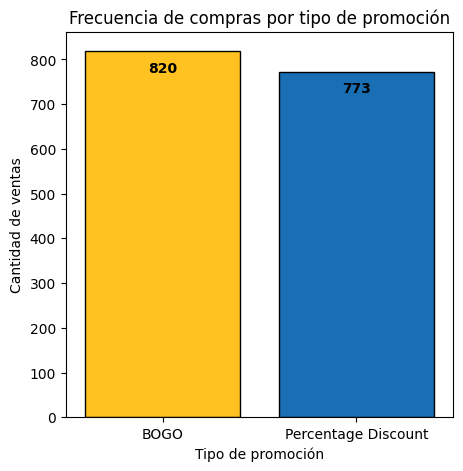

In [51]:
# Agrupa por 'promotion_type' y cuenta las ventas
agrupar_promocion = df.groupby('promotion_type')['product_name'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(5, 5))

# Crea el gráfico de barras verticales
bars = sns.barplot(
    x=agrupar_promocion.index,
    y=agrupar_promocion.values,
    hue=agrupar_promocion.index,  # Asignar hue a la categoría
    palette=["#0071CE"] * len(agrupar_promocion),  # Color azul para todas las barras
    ax=ax  # Asignar el gráfico a los ejes 'ax'
)

# Encuentra el índice del tipo de promoción con el valor más alto
max_index = agrupar_promocion.idxmax()
index_of_max = agrupar_promocion.index.get_loc(max_index)

# Resalta la barra con el valor más alto en violeta
bars.patches[index_of_max].set_color("#FFC220")

for i, bar in enumerate(bars.patches):
  value = bar.get_height()
  ax.text(
        bar.get_x() + bar.get_width() / 2,  # Posiciona el texto en el centro de la barra
        value * 0.95,  # Coloca el texto a la mitad de la altura de la barra
        f'{value:,.0F}',
        va='center',
        ha='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

for bar in bars.patches:
    bar.set_edgecolor("black")
    bar.set_linewidth(1)

# Personaliza el gráfico
ax.set_title('Frecuencia de compras por tipo de promoción')
ax.set_xlabel('Tipo de promoción')
ax.set_ylabel('Cantidad de ventas')

# Mostrar gráfico
plt.show()


#¿Existe una relación entre la fidelidad del cliente y su nivel de gasto?

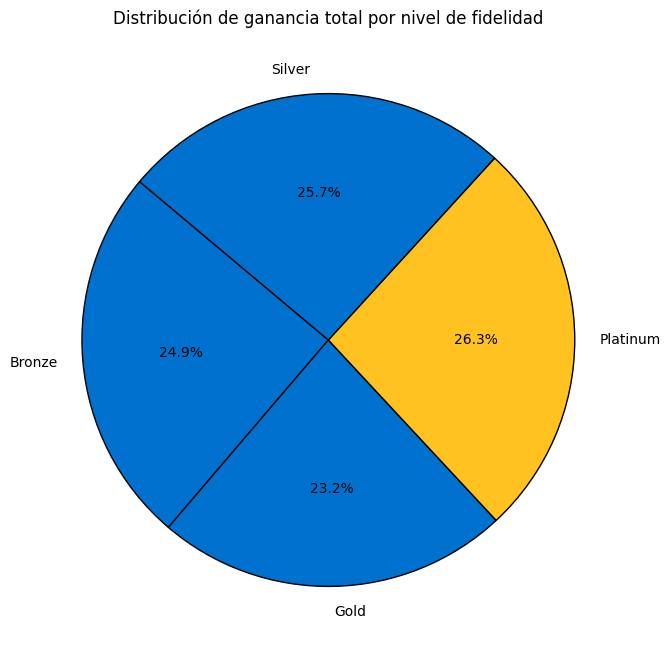

In [56]:
# Calcular la ganancia total por nivel de fidelidad
df['total_profit'] = df['quantity_sold'] * df['unit_price']
benefecio_lealtad = df.groupby('customer_loyalty_level')['total_profit'].sum()

# Identificar el índice del nivel de fidelidad con la mayor ganancia
max_index = benefecio_lealtad.idxmax()

# Crear una lista de colores, asignando #FFC220 al nivel con mayor ganancia
colors = ['#0071CE'] * len(benefecio_lealtad)  # Asignar el color azul a todas las secciones
colors[benefecio_lealtad.index.get_loc(max_index)] = '#FFC220'  # Cambiar el color del mayor porcentaje

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    benefecio_lealtad,
    labels=benefecio_lealtad.index,
    autopct='%1.1f%%',  # Formateo porcentaje
    startangle=140,
    colors=colors,  # Usar los colores definidos
    wedgeprops={'edgecolor': 'black'}  # Borde negro
)

plt.title('Distribución de ganancia total por nivel de fidelidad')

plt.show()

#¿En qué mes se venden más productos? ¿Hay una relación con las fechas festivas?


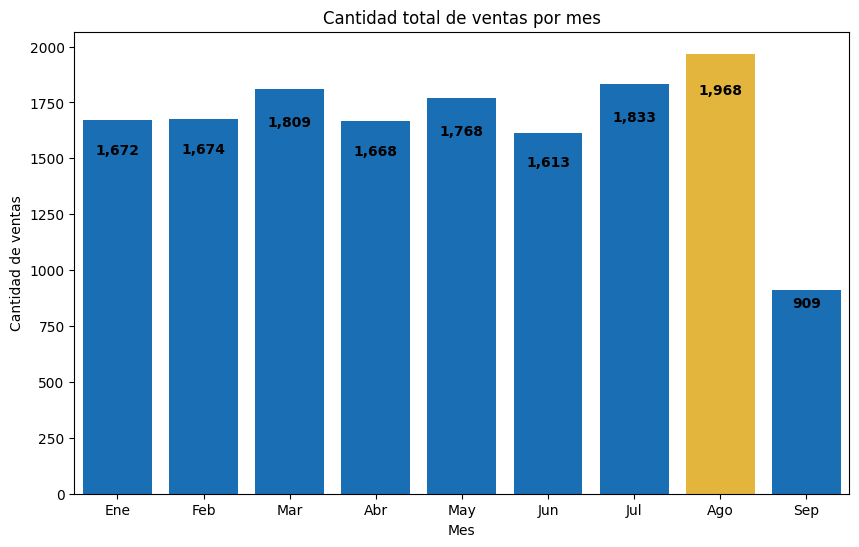

In [62]:
# Formateo mes
df['month'] = df['transaction_date'].str.split('/').str[0].astype(int)

# Agrupar por mes y sumar las ventas
ventas_mes = df.groupby('month')['quantity_sold'].sum()

# Identificar el índice del mes con la mayor venta
max_index = ventas_mes.idxmax()

# Crear una lista de colores, asignando #FFC220 al mes con mayor venta
colors = ['#0071CE'] * len(ventas_mes)  # Asignar el color azul a todas las barras
colors[ventas_mes.index.get_loc(max_index)] = '#FFC220'  # Cambiar el color de la barra con mayor venta

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=ventas_mes.index,
    y=ventas_mes.values,
    hue=ventas_mes.index,  # Asignamos 'hue' al eje x (meses)
    palette=colors,  # Usamos la lista de colores personalizada
    legend=False  # Desactivamos la leyenda
)

# Personalizar gráfico
plt.title('Cantidad total de ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')

# Agregar etiquetas con los valores dentro de cada barra
for i, value in enumerate(ventas_mes.values):
    ax.text(i, value * 0.90, f'{value:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Etiquetas de los meses en el eje X
plt.xticks(range(9), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep'])

# Mostrar el gráfico
plt.show()


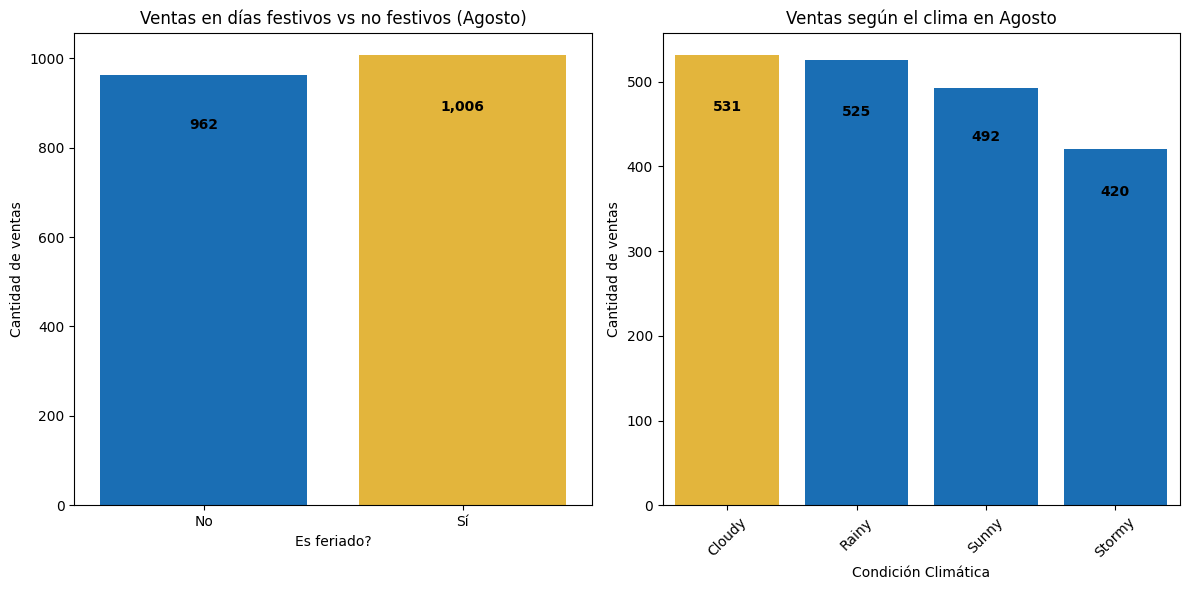

In [16]:
df['month'] = df['transaction_date'].astype(str).str.split('/').str[0].astype(int)

# Filtrar solo agosto (mes 8)
df_agosto = df[df['month'] == 8]

# Agrupar ventas por feriado
ventas_feriado = df_agosto.groupby('holiday_indicator')['quantity_sold'].sum()

# Agrupar ventas por condición climática
ventas_clima = df_agosto.groupby('weather_conditions')['quantity_sold'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de ventas en días festivos vs no festivos
ax1 = sns.barplot(x=ventas_feriado.index, y=ventas_feriado.values, hue=ventas_feriado.index, palette=["#0071CE", "#FFC220"], legend=False, ax=axes[0])
axes[0].set_title('Ventas en días festivos vs no festivos (Agosto)')
axes[0].set_xlabel('Es feriado?')
axes[0].set_ylabel('Cantidad de ventas')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Sí'])

# Agregar valores dentro de las barras
for i, value in enumerate(ventas_feriado.values):
    ax1.text(i, value * 0.9, f'{value:,.0f}', ha='center', va='top', fontsize=10, fontweight='bold', color='black')

# Gráfico de ventas según condiciones climáticas con color amarillo solo al valor más alto
# Determinamos el índice del valor más alto
max_ventas_clima = ventas_clima.idxmax()

# Asignamos colores específicos, amarillo al máximo y azul al resto
colores = [max_ventas_clima if x == max_ventas_clima else "Otros" for x in ventas_clima.index]

# Usamos el 'hue' para aplicar los colores
ax2 = sns.barplot(x=ventas_clima.index, y=ventas_clima.values, hue=colores, palette={"Otros": "#0071CE", max_ventas_clima: "#FFC220"}, legend=False, ax=axes[1])
axes[1].set_title('Ventas según el clima en Agosto')
axes[1].set_xlabel('Condición Climática')
axes[1].set_ylabel('Cantidad de ventas')
axes[1].tick_params(axis='x', rotation=45)

# Agregar valores dentro de las barras
for i, value in enumerate(ventas_clima.values):
    ax2.text(i, value * 0.9, f'{value:,.0f}', ha='center', va='top', fontsize=10, fontweight='bold', color='black')

# Mostrar gráficos
plt.tight_layout()
plt.show()


#¿Cómo se comparan la demanda pronosticada (forecasted demand) y la demanda real (actual demand)?

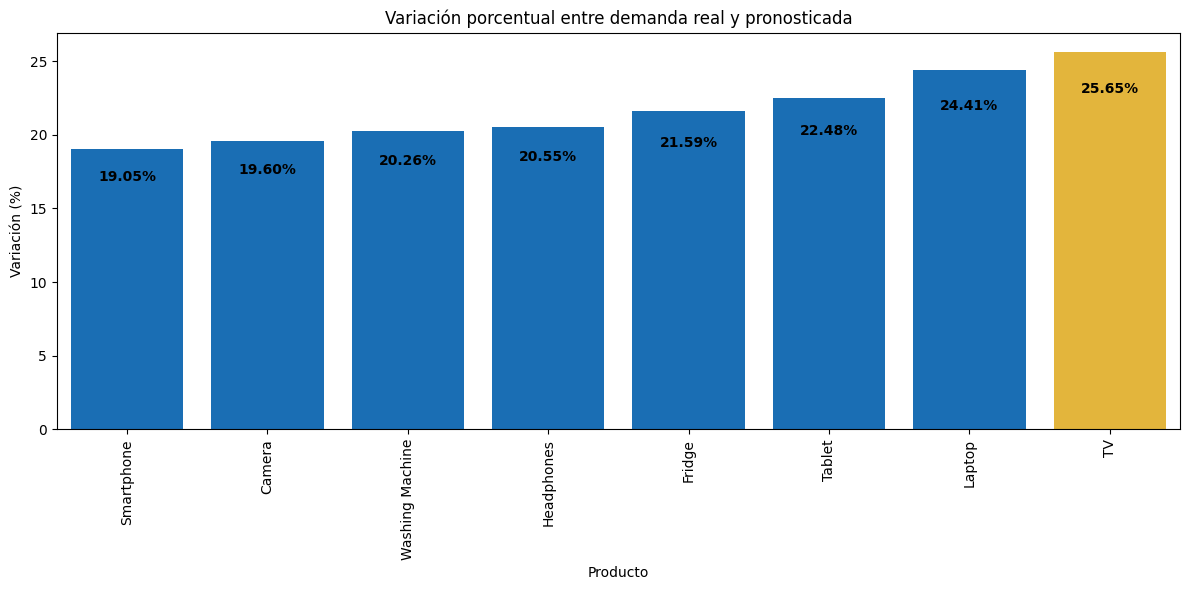

In [18]:
# Calcular la variación porcentual
df['demand_variation'] = ((df['actual_demand'] - df['forecasted_demand']) / df['forecasted_demand']) * 100

# Agrupar por producto y calcular la variación promedio
variacion_demanda_producto = df.groupby('product_name')['demand_variation'].mean().sort_values()

# Determinamos el índice del valor más alto
maxima_variacion_prodcuto = variacion_demanda_producto.idxmax()

# Asignamos colores específicos, amarillo al máximo y azul al resto
colores = [maxima_variacion_prodcuto if x == maxima_variacion_prodcuto else "Otros" for x in variacion_demanda_producto.index]

# Usamos el 'hue' para aplicar los colores
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=variacion_demanda_producto.index, y=variacion_demanda_producto.values, hue=colores, palette={"Otros": "#0071CE", maxima_variacion_prodcuto: "#FFC220"}, legend=False)

# Personalizar el gráfico
plt.title('Variación porcentual entre demanda real y pronosticada')
plt.xlabel('Producto')
plt.ylabel('Variación (%)')
plt.xticks(rotation=90)

# Agregar etiquetas con los valores dentro de las barras
for i, value in enumerate(variacion_demanda_producto.values):
    ax.text(i, value * 0.9, f'{value:.2f}%', ha='center', va='center', fontsize=10, fontweight='bold', color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
